In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import math
from plotDecBoundaries_2 import plotDecBoundaries_2

In [63]:
class NMC:
    ##Finding the mean of different classes
    def sample_mean(self,X):
        class_lable=np.unique(X[:,-1])
        average_1=[]
        for individual_lable in class_lable:
            cd=X[X[:,-1]==individual_lable]
            class_average=np.mean(cd[:,:-1],axis=0)
            average_1.append(class_average)
        self.average_1=np.array(average_1)

    #predicting
    def prediction(self,X):
        y_prediction=[]
        for x in X:
            #Calculating discriminant functions for each class
            d1=(np.linalg.norm(x-self.average_1[0]))**2
            d2=(np.linalg.norm(x-self.average_1[1]))**2
            d3=(np.linalg.norm(x-self.average_1[2]))**2
            d4=(np.linalg.norm(x-self.average_1[3]))**2
            d5=(np.linalg.norm(x-self.average_1[4]))**2
            d=[d1,d2,d3,d4,d5]
            y_prediction.append(d.index(min(d)))
        return np.array(y_prediction)
     
    #finding the accuray for datasets
    def classification_accuracy(self,X,y):
        y_prediction=self.prediction(X)
        count=0
        for y1,y2 in zip(y_prediction,y):
            if y1==y2:
                count+=1
        accuracy=(count/len(y_prediction))*100
        return accuracy
    
    #fiting the  datasets
    def fit(self,X,y):
        self.X=X
        self.Y=y
        data=np.column_stack((self.X,self.Y))
        self.sample_mean(data)
    
    #plotting the data-points
    def plotting(self,X,Y,fsize=(6,4)):
        mean_1=self.average_1[:,0]
        mean_2=self.average_1[:,1]
        mean2=np.column_stack((mean_1,mean_2))
        plotDecBoundaries_2(X,Y,mean2,fsize,legend_on=True)
        
    def check_sum(self):
        return self.average_1
    
        

In [64]:
df1= pd.read_csv('/Users/shivanshamattya/Desktop/EE559/HWPDF/HW_2 datasets/HW2_train_set.csv') 
df2= pd.read_csv('/Users/shivanshamattya/Desktop/EE559/HWPDF/HW_2 datasets/HW2_test_set.csv')

In [65]:

train=np.array(df1)
test=np.array(df2)


x_train=train[:,:-1]
Y_train=train[:,-1]
Y_train=np.array(Y_train,dtype=int)

X_test=test[:,:-1]
Y_test=test[:,-1]
Y_test=np.array(Y_test,dtype=int)

In [66]:
# For visualization, run it again using only the following 2 features: X1 and X2. Plot in 2D feature space: the training data, decision boundaries, and decision regions for all the classes. 
# Report the classification accuracy on the training set and test set, using only the 2 features. As a check, do the decision boundaries look consistent with the class means, given it’s a NMC?
N=NMC()
#fitting the data-point
N.fit(x_train,Y_train)

#prediction 
y_predtion=N.prediction(X_test)

In [67]:
# calculating classification acuracy for training data-sets
print(N.classification_accuracy(x_train,Y_train))

#prediction
y_predtion=N.prediction(X_test)

# calculating classification acuracy for testing data-sets
print(N.classification_accuracy(X_test,Y_test))

85.23809523809524
82.44444444444444


In [68]:
A=NMC()
#plotting
x_train1=x_train[:,0]
x_train2=x_train[:,1]
x_train3=np.column_stack((x_train1,x_train2))

A.fit(x_train3,Y_train)
#prediction
y_predtion=A.prediction(x_train3)

# calculating classification acuracy for train data-sets
print(A.classification_accuracy(x_train3,Y_train))

x_test1=X_test[:,0]
x_test2=X_test[:,1]
x_test3=np.column_stack((x_test1,x_test2))

# calculating classification acuracy for testing data-sets
print(A.classification_accuracy(x_test3,Y_test))


50.857142857142854
48.0


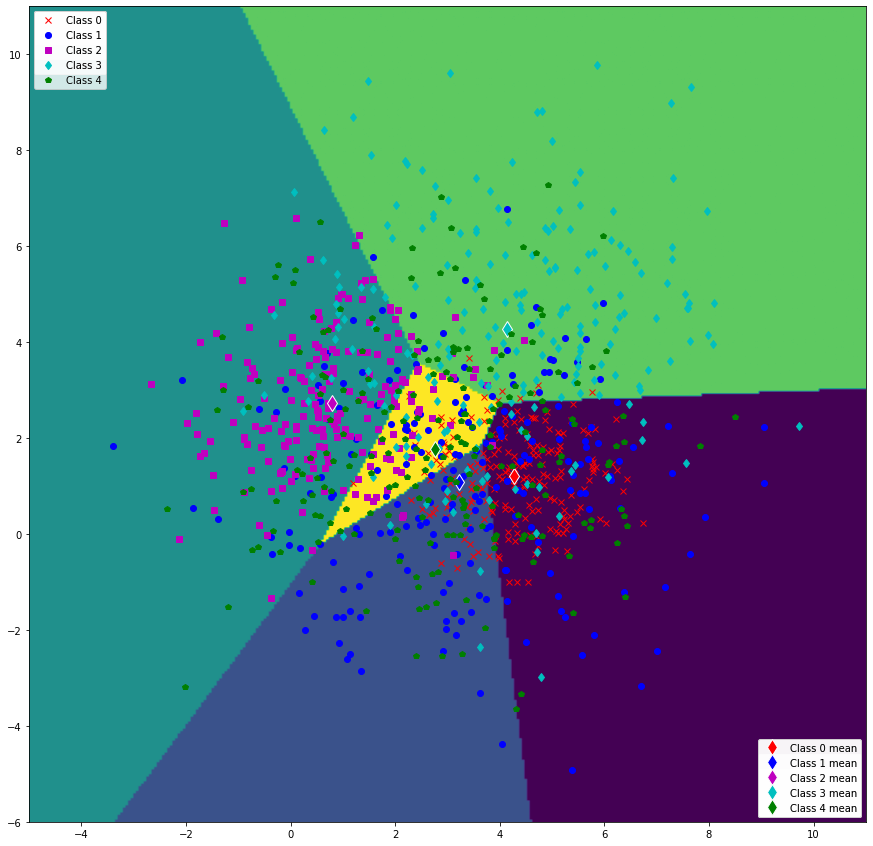

In [69]:
A.plotting(x_train3,Y_train,(15,15))

In [70]:
M=NMC()
x_train1=x_train[:,2]
x_train2=x_train[:,3]
x_train3=np.column_stack((x_train1,x_train2))
#fitting the data-point
M.fit(x_train3,Y_train)

# calculating classification acuracy for training data-sets
p1=M.classification_accuracy(x_train3,Y_train)
print(p1)


x_test1=X_test[:,2]
x_test2=X_test[:,3]
x_test3=np.column_stack((x_test1,x_test2))


# calculating classification acuracy for testing data-sets
p2=M.classification_accuracy(x_test3,Y_test)
print(p2)



60.952380952380956
60.44444444444444


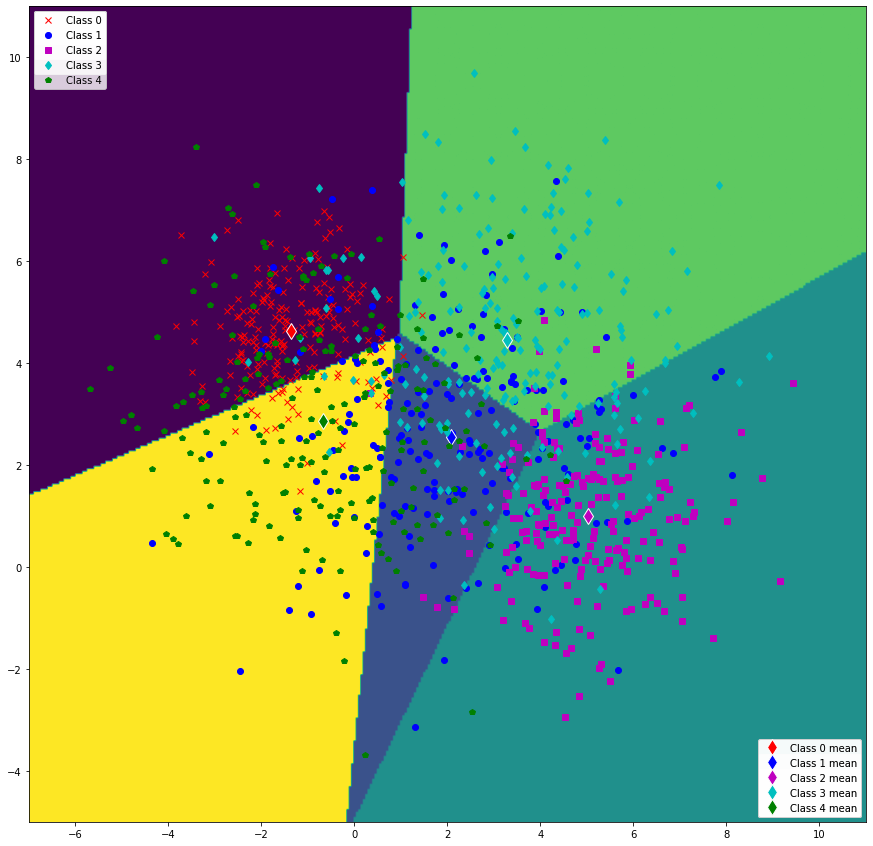

In [71]:
M.plotting(x_train3,Y_train,(15,15))

In [72]:
P=NMC()
x_train1=x_train[:,2]
x_train2=x_train[:,-1]
x_train3=np.column_stack((x_train1,x_train2))
#fitting the data-point
P.fit(x_train3,Y_train)

# calculating classification acuracy for training data-sets
p1=P.classification_accuracy(x_train3,Y_train)
print(p1)


x_test1=X_test[:,2]
x_test2=X_test[:,-1]
x_test3=np.column_stack((x_test1,x_test2))


# calculating classification acuracy for testing data-sets
p2=P.classification_accuracy(x_test3,Y_test)
print(p2)

67.61904761904762
63.77777777777778


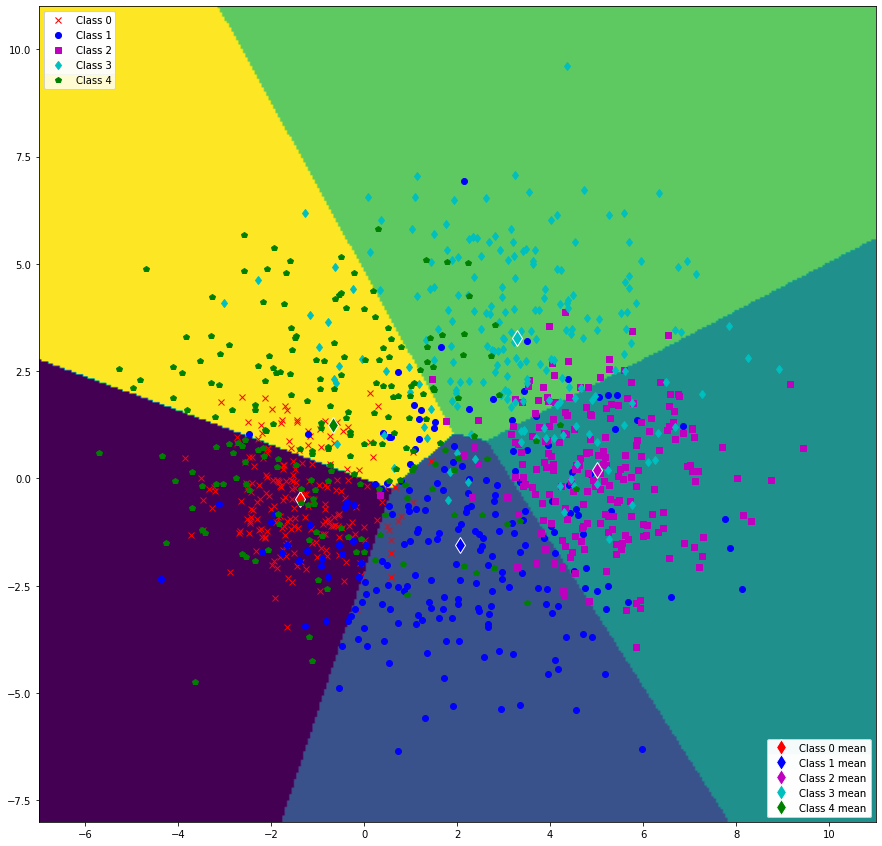

In [73]:
P.plotting(x_train3,Y_train,(15,15))